<a href="https://colab.research.google.com/github/vignesh4836/edatheoda1/blob/main/edatheoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#21BDS0084-Vigneshwaran S
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv")

In [ ]:
df.shape

(765, 13)

In [ ]:
df.head()

,rownames,state,year,miles,fatalities,seatbelt,speed65,speed70,drinkage,alcohol,income,age,enforce
0,1,AK,1983,3358,0.044669,NaN,no,no,yes,no,17973,28.234966,no
1,2,AK,1984,3589,0.037336,NaN,no,no,yes,no,18093,28.343542,no
2,3,AK,1985,3840,0.033073,NaN,no,no,yes,no,18925,28.372816,no
3,4,AK,1986,4008,0.025200,NaN,no,no,yes,no,18466,28.396652,no
4,5,AK,1987,3900,0.019487,NaN,no,no,yes,no,18021,28.453251,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    765 non-null    int64  
 1   state       765 non-null    object 
 2   year        765 non-null    int64  
 3   miles       765 non-null    int64  
 4   fatalities  765 non-null    float64
 5   seatbelt    556 non-null    float64
 6   speed65     765 non-null    object 
 7   speed70     765 non-null    object 
 8   drinkage    765 non-null    object 
 9   alcohol     765 non-null    object 
 10  income      765 non-null    int64  
 11  age         765 non-null    float64
 12  enforce     765 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 77.8+ KB


In [ ]:
!git clone https://github.com/vignesh4836/edatheoda1.git

Cloning into 'edatheoda1'...


In [ ]:
df.describe()

,rownames,year,miles,fatalities,seatbelt,income,age
count,765.000000,765.00000,765.000000,765.000000,556.000000,765.000000,765.000000
mean,383.000000,1990.00000,41447.734641,0.021490,0.528852,17992.586928,35.137194
std,220.980768,4.32332,43961.990037,0.006171,0.170186,4811.459296,1.698131
min,1.000000,1983.00000,3099.000000,0.008327,0.060000,8372.000000,28.234966
25%,192.000000,1986.00000,11401.000000,0.017341,0.420000,14266.000000,34.387501
50%,383.000000,1990.00000,30319.000000,0.021199,0.550000,17624.000000,35.391766
75%,574.000000,1994.00000,52312.000000,0.024774,0.650000,21080.000000,36.130787
max,765.000000,1997.00000,285612.000000,0.045470,0.870000,35863.000000,39.169582


In [ ]:
df.isnull().sum()

,0
rownames,0
state,0
year,0
miles,0
fatalities,0
seatbelt,0
speed65,0
speed70,0
drinkage,0
alcohol,0


In [ ]:
mean_value = df['seatbelt'].mean()
df['seatbelt'].fillna(mean_value, inplace=True)


<ipython-input-8-47b190ccb494>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seatbelt'].fillna(mean_value, inplace=True)


In [ ]:
df.isnull().sum()

,0
rownames,0
state,0
year,0
miles,0
fatalities,0
seatbelt,0
speed65,0
speed70,0
drinkage,0
alcohol,0


In [ ]:
df.duplicated().sum()


0

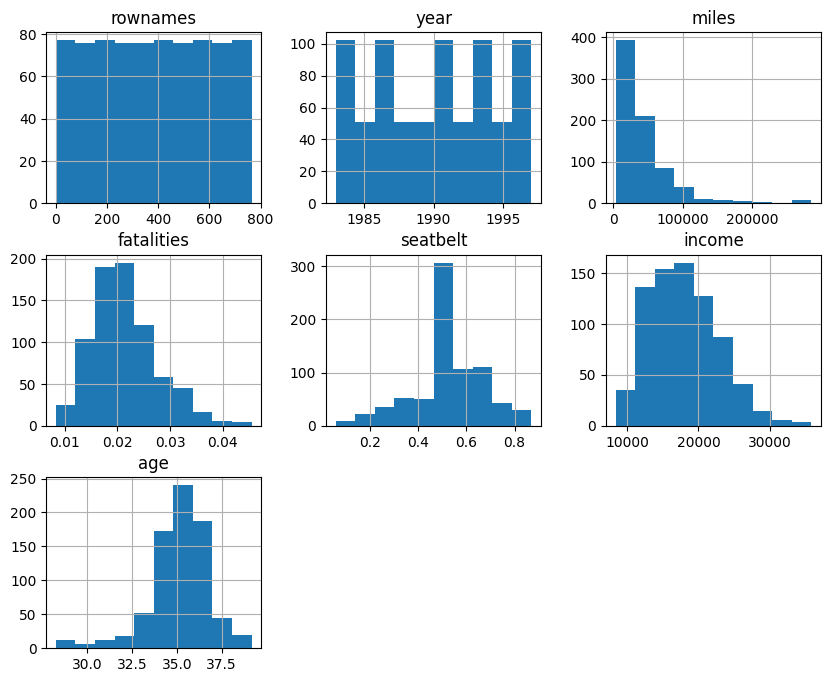

In [ ]:
df.hist(figsize=(10, 8))
plt.show()

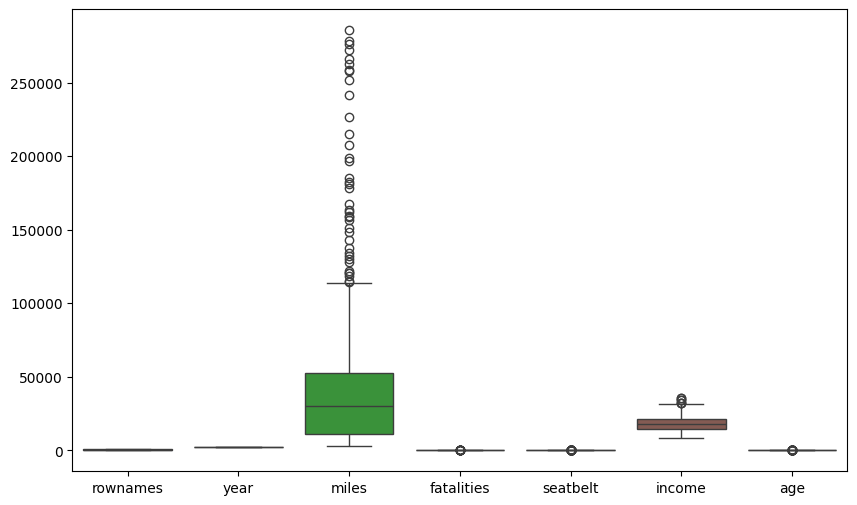

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

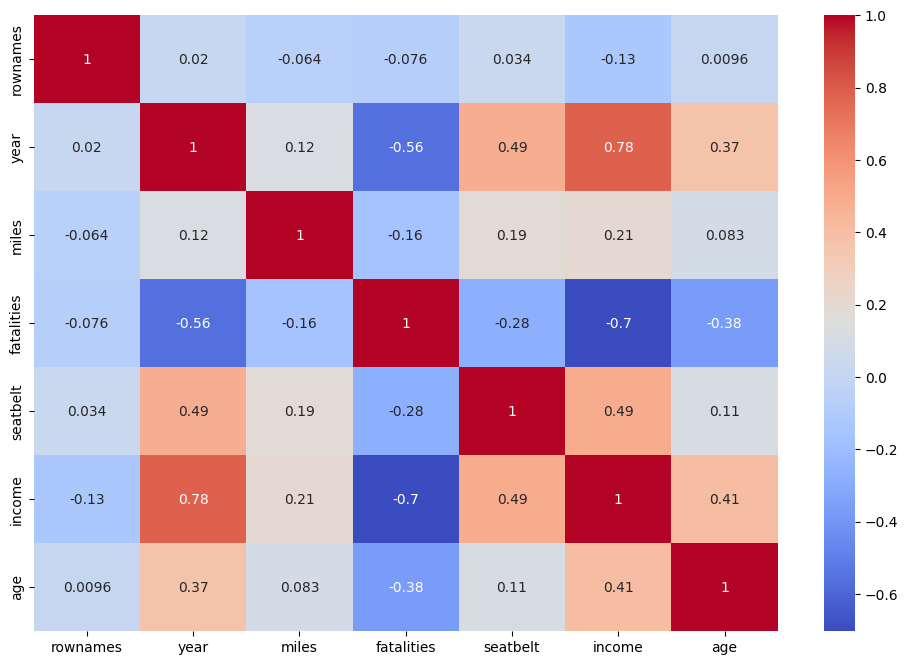

In [ ]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


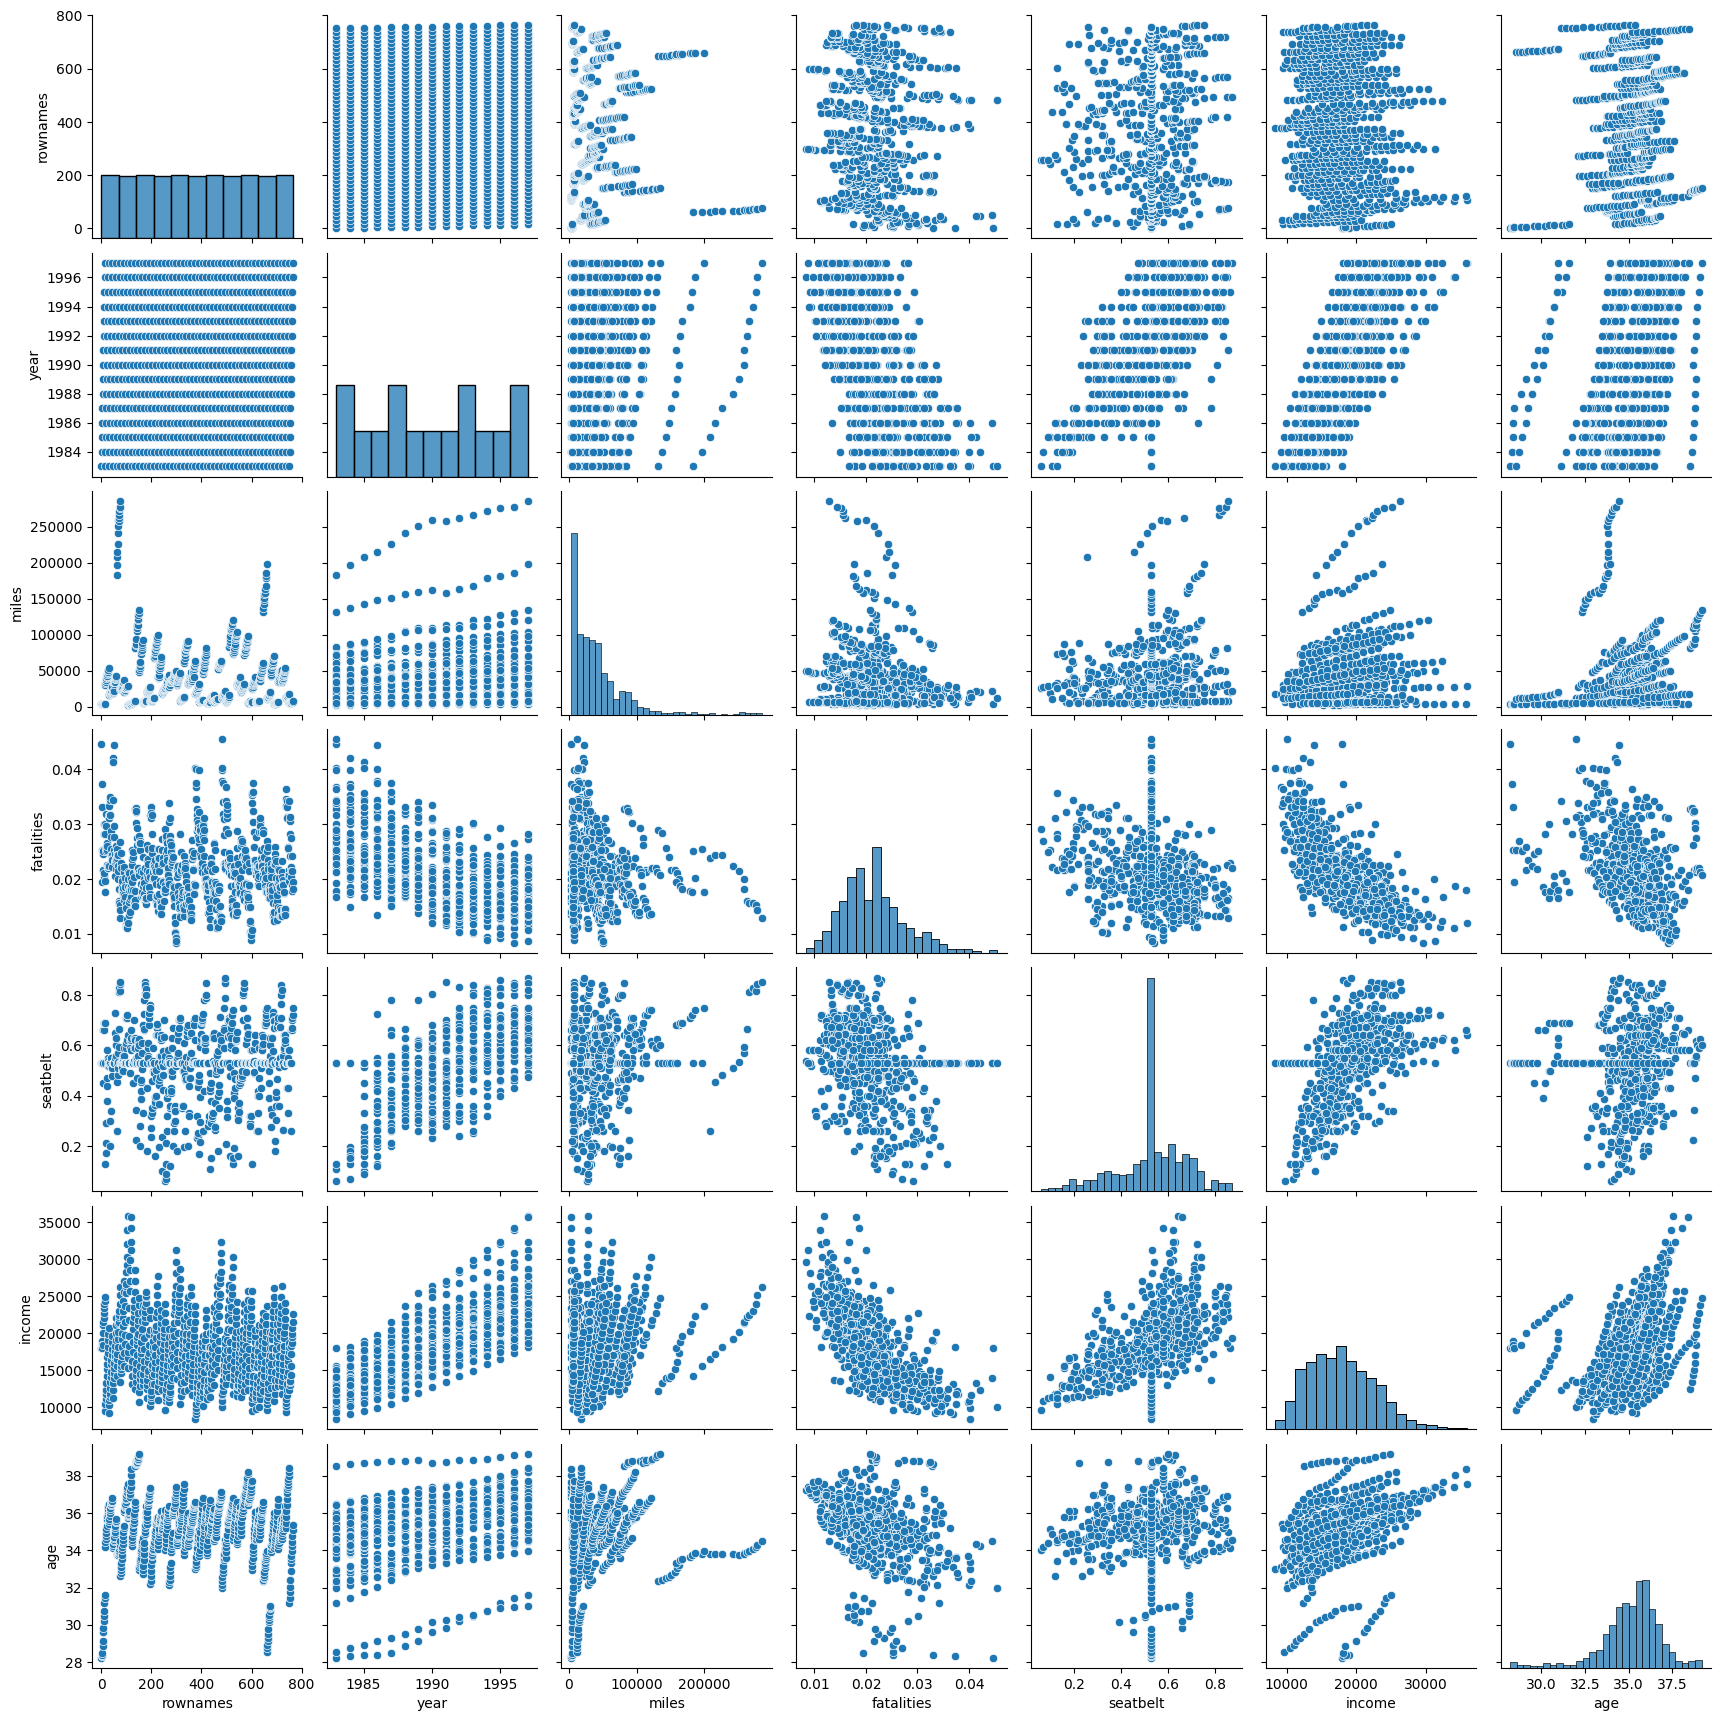

In [ ]:
sns.pairplot(df)
plt.show()


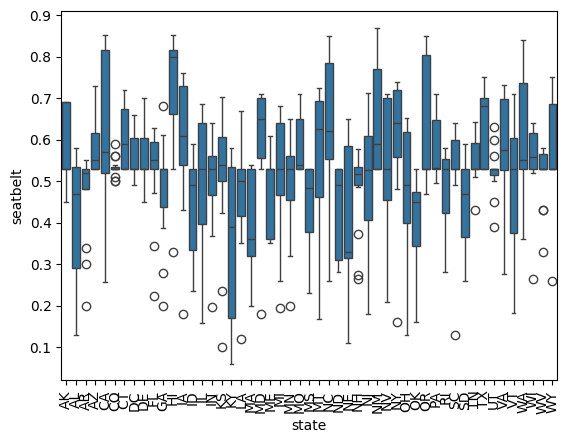

In [ ]:
sns.boxplot(x='state', y='seatbelt', data=df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.select_dtypes(include=[np.number]))
pca_result

array([[-38080.13957465,    851.67515924],
       [-37846.46186563,    966.36609977],
       [-37576.54286224,   1792.40456423],
       ...,
       [-34333.46155915,   3474.6905612 ],
       [-33998.39975522,   4306.2438684 ],
       [-33757.99528688,   5373.01496534]])

In [ ]:
# Discretize

from sklearn.preprocessing import KBinsDiscretizer
if 'income' in df.columns:
    est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    df['income_binned'] = est.fit_transform(df[['income']])


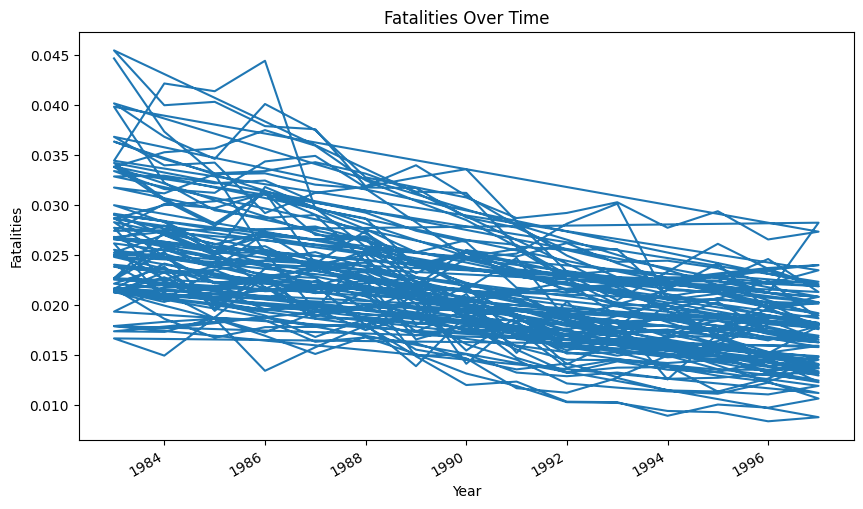

In [ ]:

if 'year' in df.columns:
    df['year'] = pd.to_datetime(df['year'], format='%Y')

    df.set_index('year', inplace=True)


    df['fatalities'].plot(figsize=(10, 6))
    plt.title("Fatalities Over Time")
    plt.xlabel("Year")
    plt.ylabel("Fatalities")
    plt.show()


In [ ]:
# statistical measures
print(df[['income', 'seatbelt', 'fatalities']].describe())


             income    seatbelt  fatalities
count    765.000000  765.000000  765.000000
mean   17992.586928    0.528852    0.021490
std     4811.459296    0.145052    0.006171
min     8372.000000    0.060000    0.008327
25%    14266.000000    0.481000    0.017341
50%    17624.000000    0.528852    0.021199
75%    21080.000000    0.620000    0.024774
max    35863.000000    0.870000    0.045470


In [ ]:
#  contingency table
if 'enforce' in df.columns:
    contingency = pd.crosstab(df['seatbelt'], df['enforce'])
    print(contingency)


enforce   no  primary  secondary
seatbelt                        
0.060      1        0          0
0.070      1        0          0
0.090      1        0          0
0.099      1        0          0
0.110      1        0          0
...       ..      ...        ...
0.850      0        3          0
0.852      0        0          1
0.853      0        1          0
0.860      0        1          0
0.870      0        1          0

[246 rows x 3 columns]


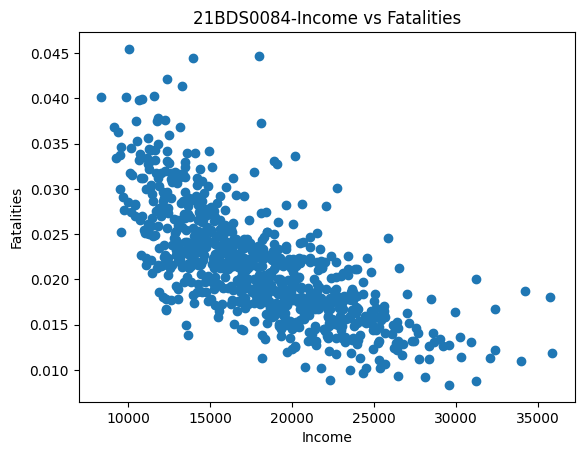

In [ ]:
# Scatter plot
plt.scatter(df['income'], df['fatalities'])
plt.title("21BDS0084-Income vs Fatalities")
plt.xlabel('Income')
plt.ylabel('Fatalities')
plt.show()


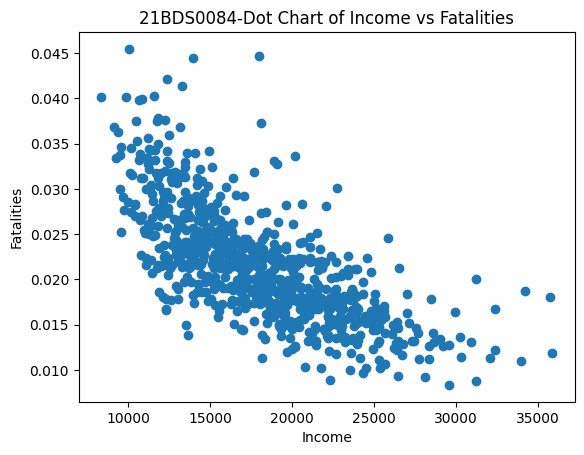

In [ ]:
# Dot chart for income vs fatalities
plt.plot(df['income'], df['fatalities'], 'o')
plt.title("21BDS0084-Dot Chart of Income vs Fatalities")
plt.xlabel('Income')
plt.ylabel('Fatalities')
plt.show()


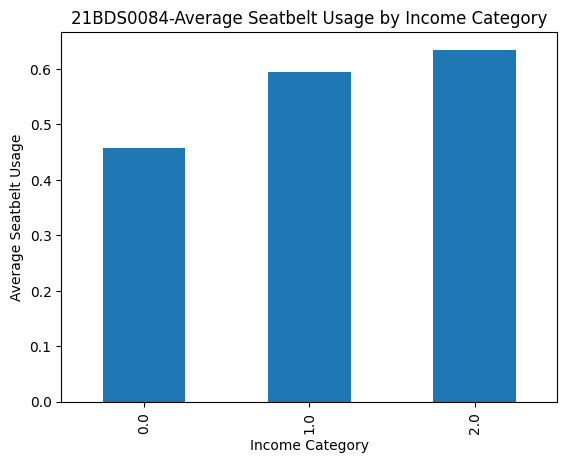

In [ ]:
# Bar plot for income categories vs average seatbelt usage
if 'income_binned' in df.columns:
    df.groupby('income_binned')['seatbelt'].mean().plot(kind='bar')
    plt.title("21BDS0084-Average Seatbelt Usage by Income Category")
    plt.xlabel("Income Category")
    plt.ylabel("Average Seatbelt Usage")
    plt.show()


In [ ]:

from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['fatalities', 'income', 'seatbelt']]))
df_outliers_removed = df[(z_scores < 3).all(axis=1)]
print(z_scores)
print(f"Data after removing outliers: {df_outliers_removed.shape}")


            fatalities    income  seatbelt
year                                      
1983-01-01    3.758546  0.004074  0.000000
1984-01-01    2.569503  0.020883  0.000000
1985-01-01    1.878209  0.193917  0.000000
1986-01-01    0.601578  0.098457  0.000000
1987-01-01    0.324672  0.005909  0.000000
...                ...       ...       ...
1993-01-01    0.610361  0.320780  0.973724
1994-01-01    0.006221  0.389412  1.180682
1995-01-01    0.428797  0.559950  1.249668
1996-01-01    0.334049  0.734439  1.318654
1997-01-01    0.552286  0.957386  1.525612

[765 rows x 3 columns]
Data after removing outliers: (750, 13)


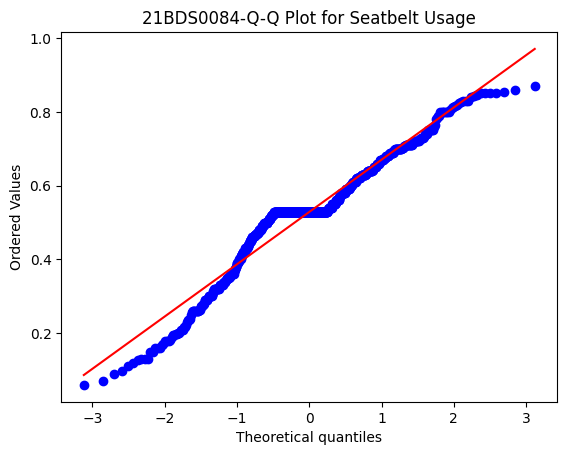

In [ ]:
import scipy.stats as stats

# Q-Q plot for 'seatbelt'
stats.probplot(df['seatbelt'], dist="norm", plot=plt)
plt.title("21BDS0084-Q-Q Plot for Seatbelt Usage")
plt.show()


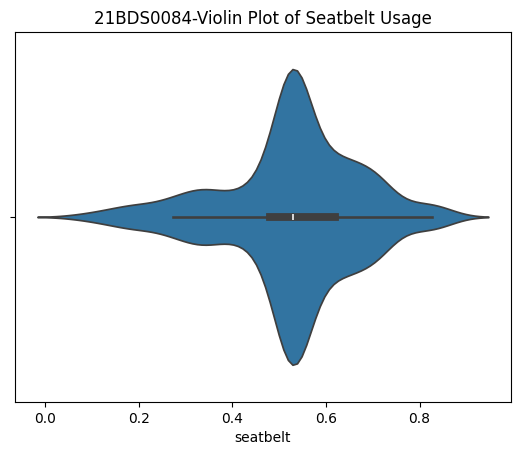

In [ ]:
sns.violinplot(x='seatbelt', data=df)
plt.title("21BDS0084-Violin Plot of Seatbelt Usage")
plt.show()


In [ ]:
# Pearson correlation test between 'income' and 'fatalities'
correlation, p_value = stats.pearsonr(df['income'], df['fatalities'])
print(f"Pearson Correlation: {correlation}, p-value: {p_value}")




Pearson Correlation: -0.7035576210085683, p-value: 2.633351921964218e-115


In [ ]:
import statsmodels.api as sm

X = df_encoded[['income', 'seatbelt']]
y = df_encoded['fatalities']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             fatalities   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     381.4
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          1.67e-115
Time:                        17:59:06   Log-Likelihood:                 3072.5
No. Observations:                 765   AIC:                            -6139.
Df Residuals:                     762   BIC:                            -6125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0368      0.001     52.935      0.0

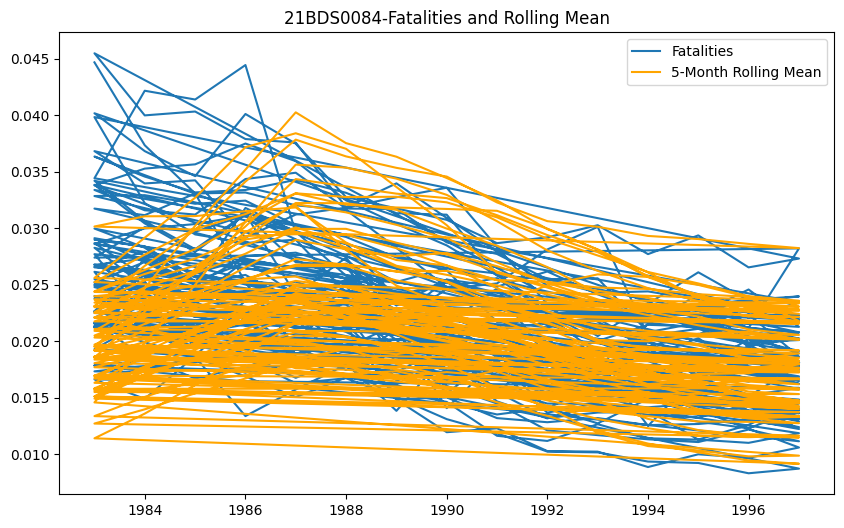

In [ ]:
# Calculate moving averages
df['rolling_mean'] = df['fatalities'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['fatalities'], label='Fatalities')
plt.plot(df['rolling_mean'], label='5-Month Rolling Mean', color='orange')
plt.title("21BDS0084-Fatalities and Rolling Mean")
plt.legend()
plt.show()


In [ ]:
# Calculate skewness and kurtosis
numeric_df = df.select_dtypes(include=[np.number])
print(f"Skewness:\n{numeric_df.skew()}")
print(f"Kurtosis:\n{numeric_df.kurt()}")


Skewness:
rownames         0.000000
miles            2.611102
fatalities       0.760025
seatbelt        -0.550761
income           0.577792
age             -1.149598
income_binned    0.475392
rolling_mean     0.602880
dtype: float64
Kurtosis:
rownames        -1.200000
miles            9.063223
fatalities       0.811355
seatbelt         0.662616
income           0.210595
age              2.970384
income_binned   -0.710170
rolling_mean     0.376925
dtype: float64


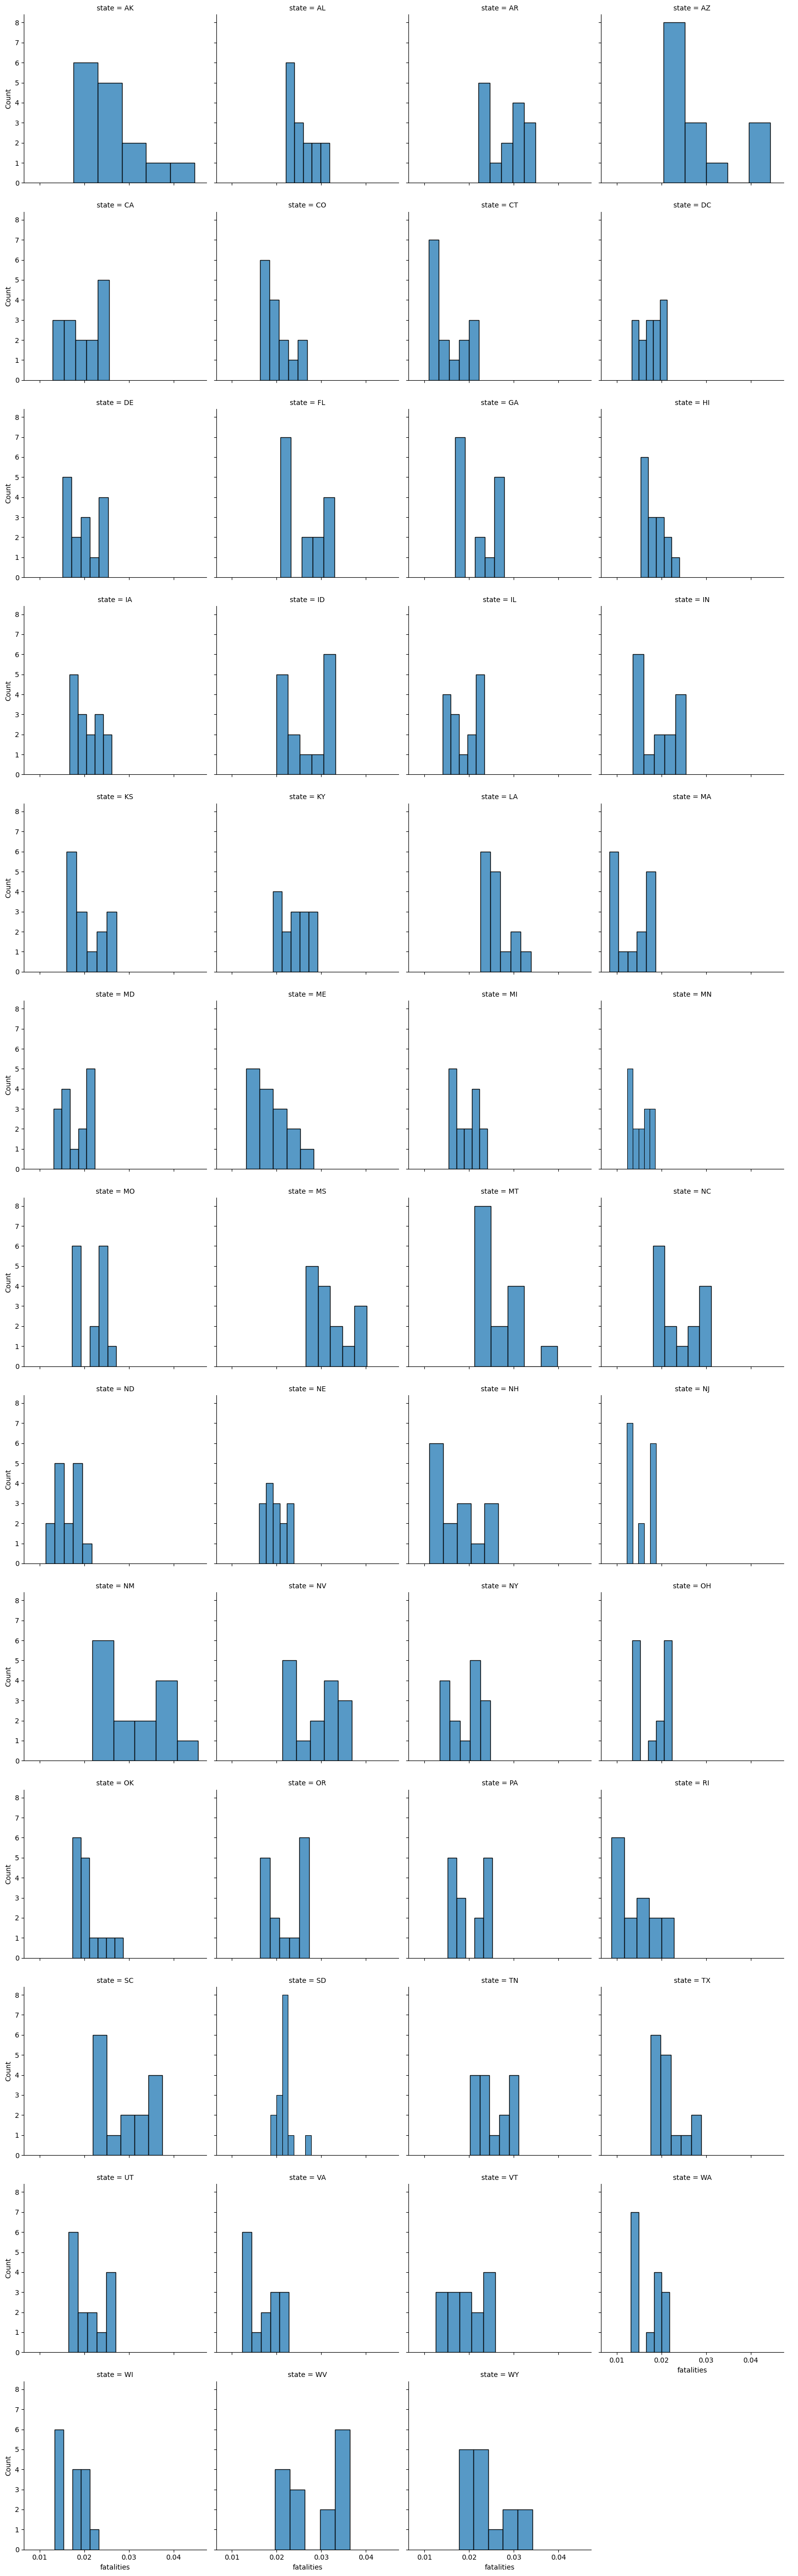

In [ ]:
g = sns.FacetGrid(df, col='state', col_wrap=4, height=4)
g.map(sns.histplot, 'fatalities')
g.add_legend()
plt.show()

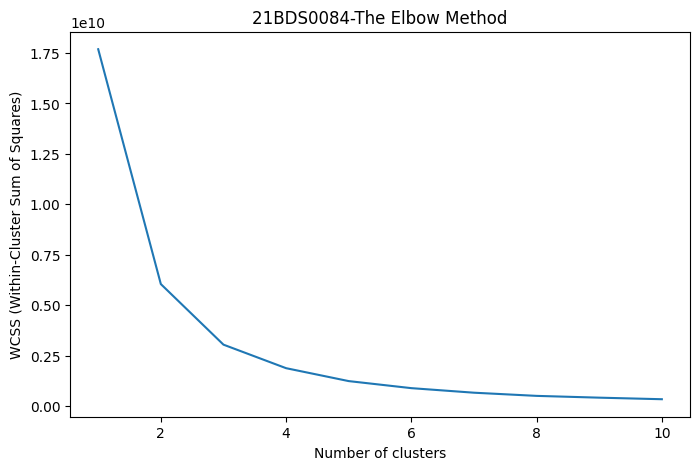

In [ ]:

X = df[['income', 'fatalities']].dropna().values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('21BDS0084-The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

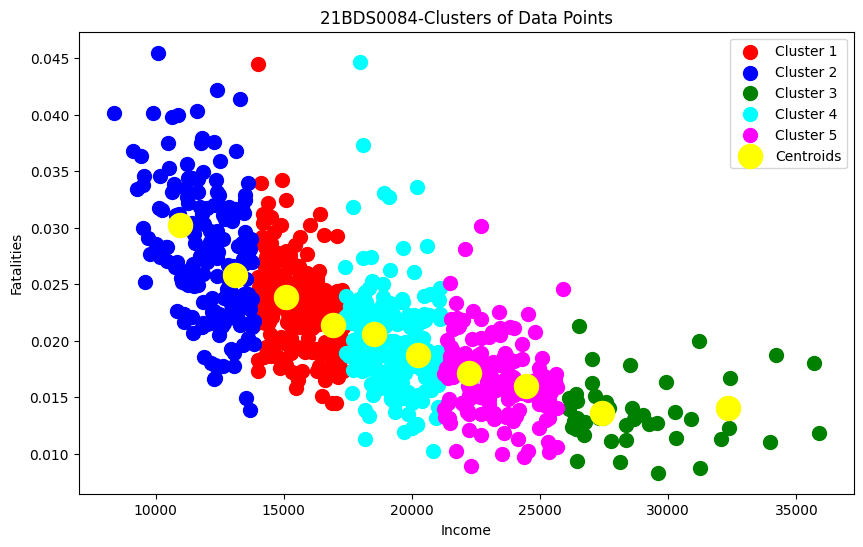

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('21BDS0084-Clusters of Data Points')
plt.xlabel('Income')
plt.ylabel('Fatalities')
plt.legend()
plt.show()


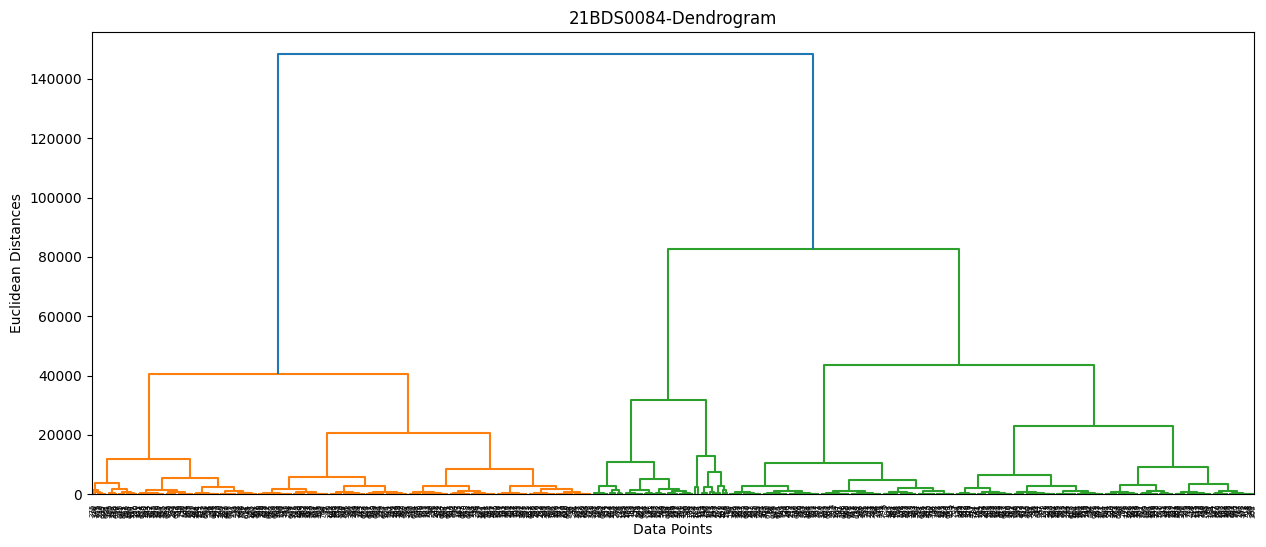

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 6))
plt.title('21BDS0084-Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()


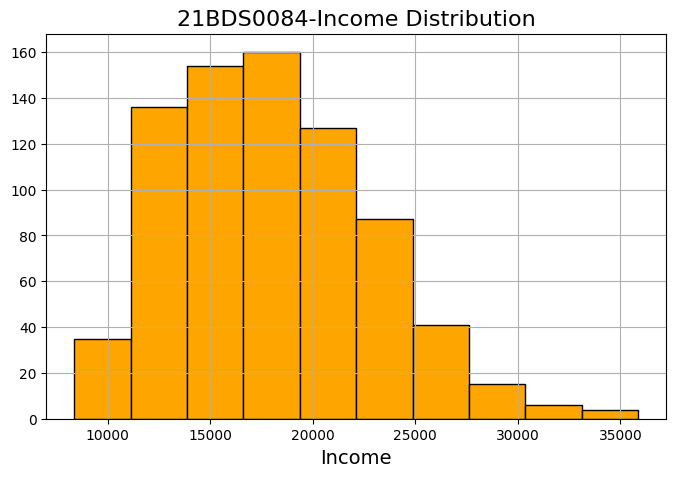

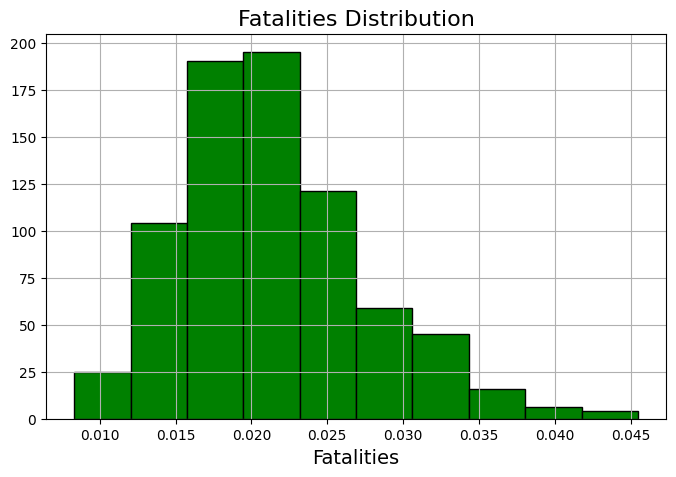

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("21BDS0084-Income Distribution", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.grid(True)
plt.hist(df['income'], color='orange', edgecolor='k')
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Fatalities Distribution", fontsize=16)
plt.xlabel("Fatalities", fontsize=14)
plt.grid(True)
plt.hist(df['fatalities'], color='green', edgecolor='k')
plt.show()


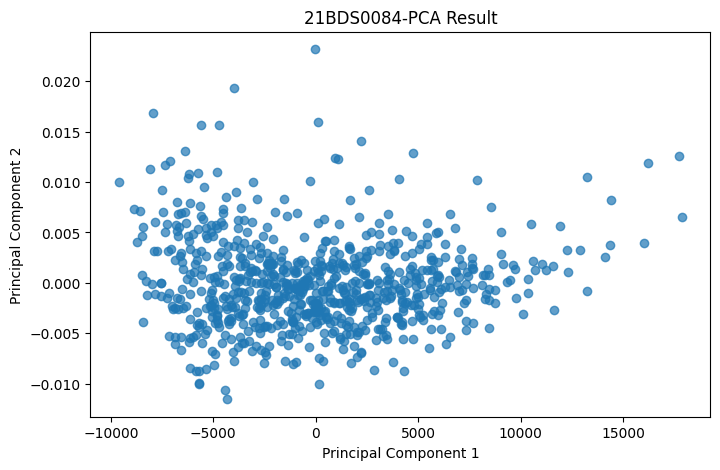

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

#PCA
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title("21BDS0084-PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

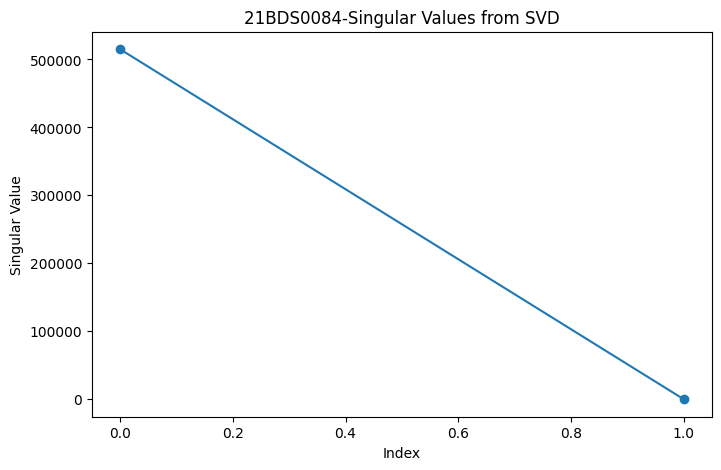

In [ ]:
#  Singular Value Decomposition
from numpy.linalg import svd
U, S, Vt = svd(X)

plt.figure(figsize=(8, 5))
plt.plot(S, marker='o')
plt.title("21BDS0084-Singular Values from SVD")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()

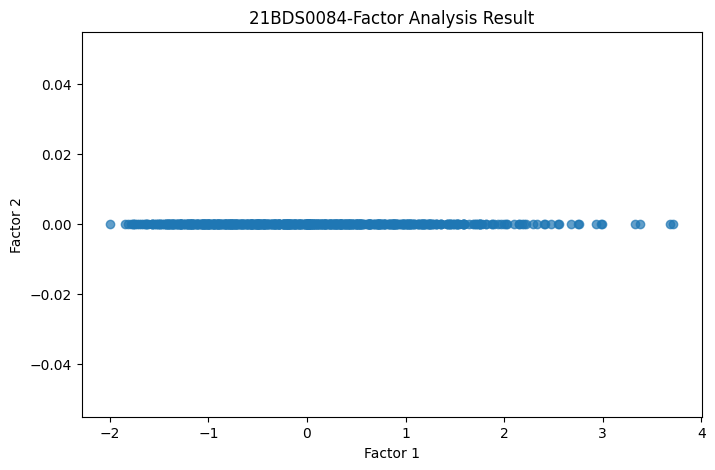

In [ ]:
from sklearn.decomposition import FactorAnalysis

#Factor Analysis
factor_analysis = FactorAnalysis(n_components=2)
fa_result = factor_analysis.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(fa_result[:, 0], fa_result[:, 1], alpha=0.7)
plt.title("21BDS0084-Factor Analysis Result")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()


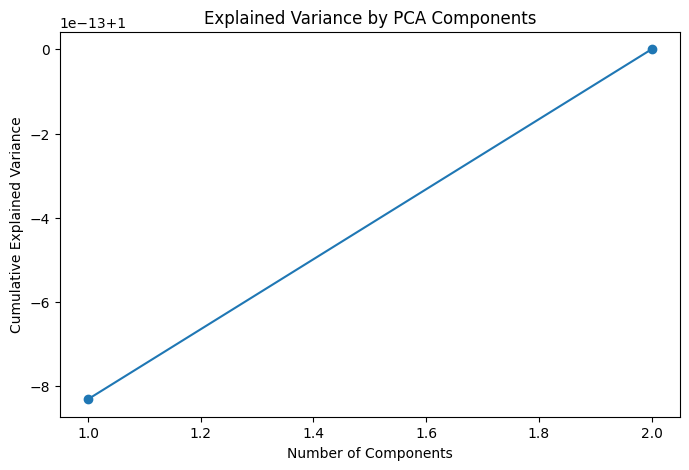

In [ ]:

pca_full = PCA().fit(X)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


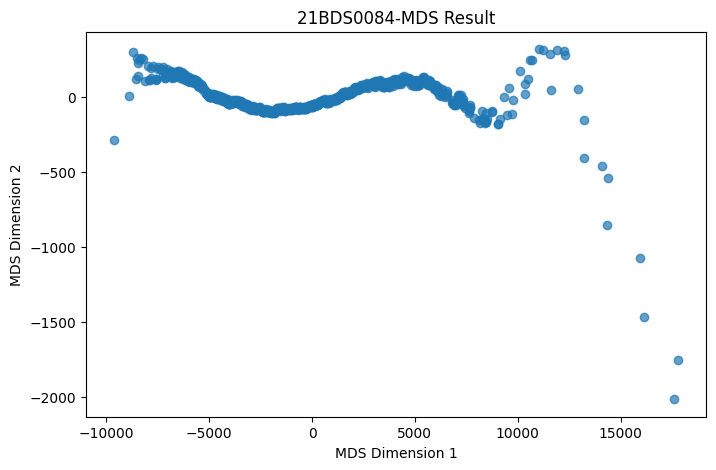

In [ ]:
from sklearn.manifold import MDS

# Multidimensional Scaling
mds = MDS(n_components=2)
mds_result = mds.fit_transform(X)

# Visualize MDS result
plt.figure(figsize=(8, 5))
plt.scatter(mds_result[:, 0], mds_result[:, 1], alpha=0.7)
plt.title("21BDS0084-MDS Result")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

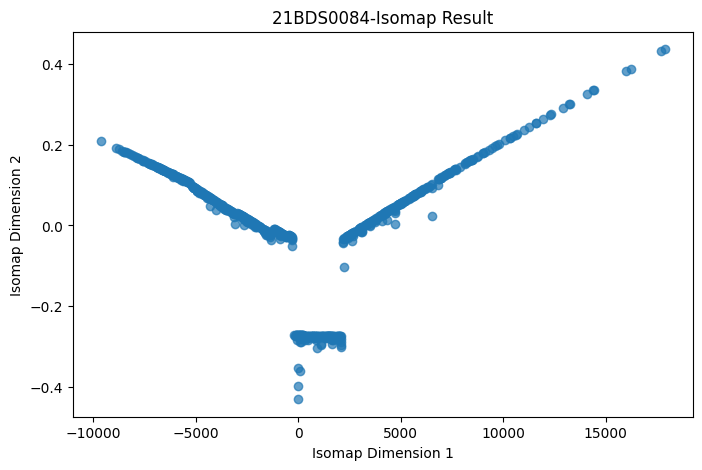

In [ ]:
from sklearn.manifold import Isomap

#Isomap
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], alpha=0.7)
plt.title("21BDS0084-Isomap Result")
plt.xlabel("Isomap Dimension 1")
plt.ylabel("Isomap Dimension 2")
plt.show()


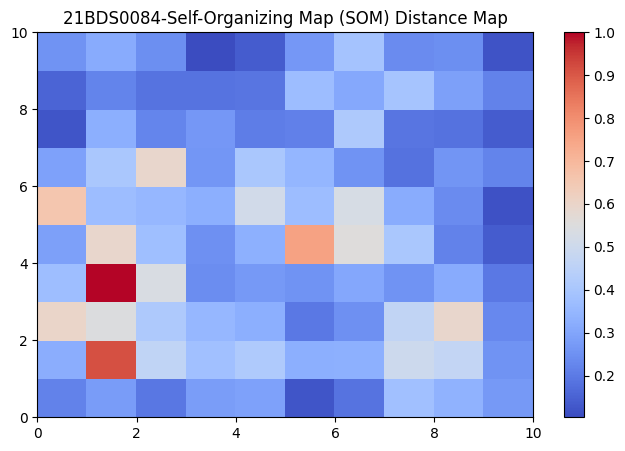

In [ ]:

#The Self-Organizing Map
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()
plt.title("21BDS0084-Self-Organizing Map (SOM) Distance Map")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
categorical_cols = ['state', 'seatbelt', 'speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=['fatalities', 'rownames'])
y = df_encoded['fatalities']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 8.454929735304724e-06
R-squared: 0.7771435414234525


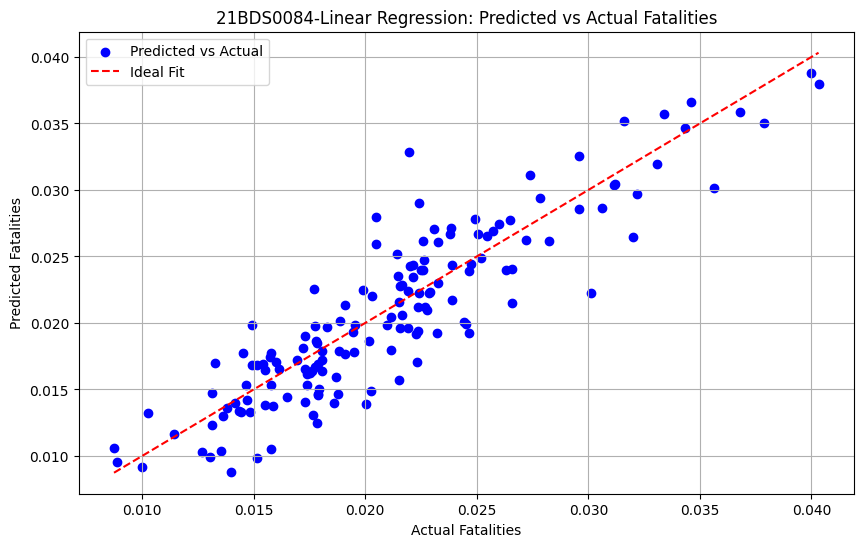

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')

plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("21BDS0084-Linear Regression: Predicted vs Actual Fatalities")
plt.legend()
plt.grid(True)


plt.show()
